R50-C4	    1x	0.110	32.2	137259246	 

R50-DC5	    1x	0.076	34.2	137260150	  

R50-FPN	    1x	0.043	35.2	137260431	  

R50-C4	    3x	0.111	34.4	137849525	  

R50-DC5	    3x	0.076	35.9	137849551	  

R50-FPN	    3x	0.043	37.2	137849600	  

R101-C4	    3x	0.145	36.7	138363239	  

R101-DC5	3x	0.092	37.3	138363294	    

R101-FPN	3x	0.056	38.6	138205316	    

X101-FPN	3x	0.103	39.5	139653917	    

New baselines using Large-Scale Jitter and Longer Training Schedule  

The following baselines of COCO Instance Segmentation with Mask R-CNN are generated using a longer training schedule and large-scale jitter as described in Google's Simple Copy-Paste Data Augmentation paper. These models are trained from scratch using random initialization. These baselines exceed the previous Mask R-CNN baselines.

R50-FPN	            100	    0.376	40.3	42047764  

R50-FPN	            200 	0.376	41.7	42047638  

R50-FPN	            400	    0.376	42.5	42019571	

R101-FPN	        100	    0.518	41.6	42025812	  

R101-FPN	        200	    0.518   43.1	42131867	  

R101-FPN	        400	    0.518	43.7	42073830	  

regnetx_4gf_dds_FPN	100	    0.071	41.3	42047771	  

regnetx_4gf_dds_FPN	200		0.071	43.1	42132721	  

regnetx_4gf_dds_FPN	400		0.071	43.5	42025447	  

regnety_4gf_dds_FPN	100		0.073	41.6	42047784	  

regnety_4gf_dds_FPN	200		0.072	43.0	42047642	  

regnety_4gf_dds_FPN	400	    0.072   43.3	42045954	  

In [1]:
from dataclasses import dataclass

@dataclass
class Model:
    name: str
    inf_time: float
    mask_AP: float
    used: bool = False

In [4]:
normal = [
    Model("R50-C4_1x", 0.110, 32.2),
    Model("R50-DC5_1x",	0.076, 34.2),
    Model("R50-FPN_1x", 0.043, 35.2),
    Model("R50-C4_3x", 0.111, 34.4),
    Model("R50-DC5_3x", 0.076, 35.9),
    Model("R50-FPN_3x", 0.043, 37.2, used=True),
    Model("R101-C4_3x",	0.145, 36.7),
    Model("R101-DC5_3x", 0.092, 37.3),
    Model("R101-FPN_3x", 0.056, 38.6, used=True),
    Model("X101-FPN_3x", 0.103, 39.5, used=True),
]

new_baseline = [
    Model("R50-FPN_100", 0.376,	40.3),
    Model("regnetx_4gf_dds_FPN_100", 0.071, 41.3),
    Model("regnety_4gf_dds_FPN_100", 0.073, 41.6),
    Model("R101-FPN_100", 0.518, 41.6),
    Model("R50-FPN_200", 0.376,	41.7),
    Model("R50-FPN_400", 0.376,	42.5),
    Model("R101-FPN_200", 0.518, 43.1),
    Model("regnety_4gf_dds_FPN_200", 0.072, 43.0),
    Model("regnetx_4gf_dds_FPN_200", 0.071, 43.1),
    Model("regnety_4gf_dds_FPN_400", 0.072, 43.3),
    Model("R101-FPN_400\n (new baseline)", 0.518, 43.7, used=True),
    Model("regnetx_4gf_dds_FPN_400\n        (new baseline)", 0.071, 43.5, used=True),
]

R50-FPN_3x
R101-FPN_3x
X101-FPN_3x
R101-FPN_400
 (new baseline)
regnetx_4gf_dds_FPN_400
        (new baseline)


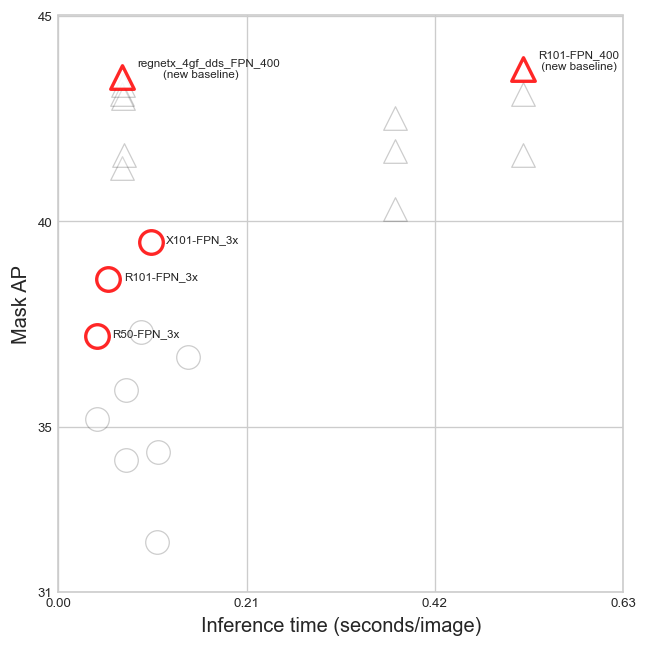

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(5.5, 5.5), dpi=120, tight_layout=True)


for model in normal + new_baseline:
    x, y = model.inf_time, model.mask_AP

    marker_shape = "o"
    if model in new_baseline:
        marker_shape = "^"
    
    if model.used:
        plt.scatter(x, y, s=200, c="w", marker=marker_shape, edgecolors="r", linewidths=2, alpha=0.85)
        plt.annotate(model.name, xy=(x, y), xytext=(x+0.017, y), size=7) # y-0.37 on xytext
        print(model.name)
    else: 
        plt.scatter(x, y, s=200, c="w",  marker=marker_shape, edgecolors="k", linewidths=0.75, alpha=0.2)

plt.xticks(np.linspace(0, 0.63, num=4), fontsize=8)
plt.yticks(np.linspace(31, 45, num=4).astype(int), fontsize=8)
plt.xlabel("Inference time (seconds/image)", fontsize=12)
plt.ylabel("Mask AP", fontsize=12)
plt.show()